In [58]:
# Import necessary Libraries
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib as plt

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [60]:
X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = [2, 3.5, 3.9, 4.6, 4.9, 5.7]

In [61]:
X.shape

(6, 1)

In [62]:
model.fit(X, y)

LinearRegression()

In [63]:
model.predict([[5]])

array([5.10285714])

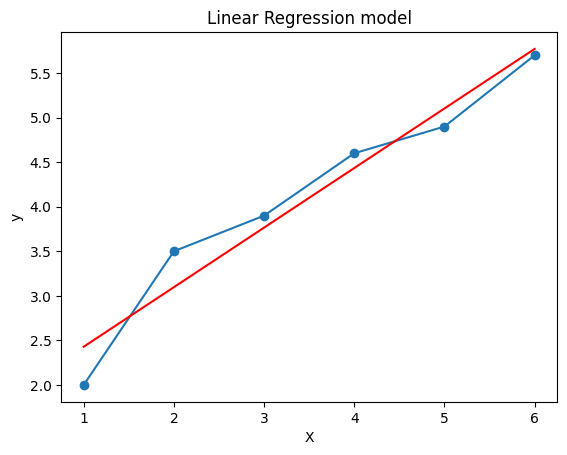

In [64]:
# Visualize the model
import matplotlib.pyplot as plt

plt.plot(X, y, marker = 'o')
plt.plot(X, model.predict(X), color = 'red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression model')
plt.show()

In [65]:

model.score(X, y)


0.9470079557246628

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0).astype(int)

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [70]:
y_pred = model.predict(X_test)


In [71]:

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
print("accuracy", accuracy)
print("conf_matrix", conf_matrix)
print("classification_report_str", classification_report_str)

accuracy 1.0
conf_matrix [[10  0]
 [ 0 20]]
classification_report_str               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [72]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


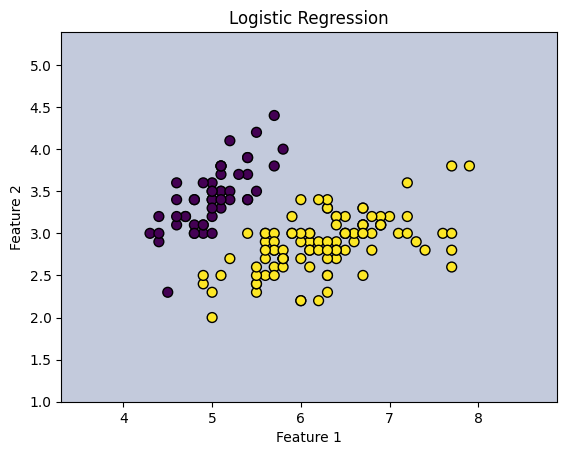

In [73]:

plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, linewidth=1)
plt.title("Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



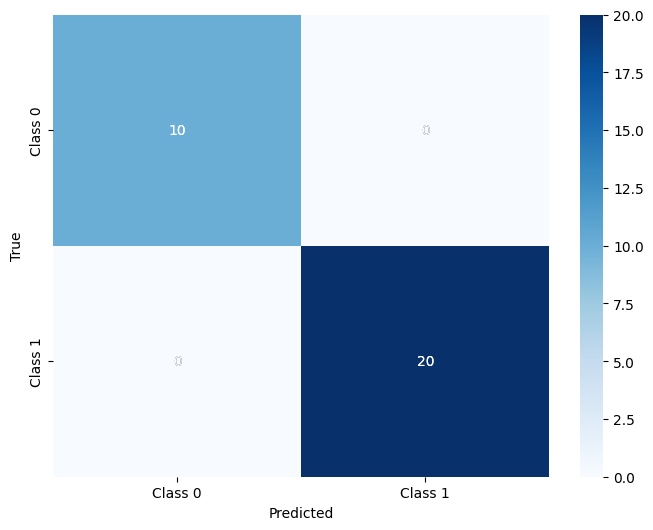

In [74]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)

classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks + 0.5, classes)
plt.yticks(tick_marks + 0.5, classes)

plt.xlabel('Predicted')
plt.ylabel('True')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j + 0.5, i + 0.5, str(conf_matrix[i, j]), ha='center', va='center', color='w')

plt.show()